# Cancer detection

Using set of [breast cancer](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29) data, create a model to predict breast cancer. Also, what traits are most indicative of whether or not an individual will be diagnosed?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
cancer = pd.read_csv('breast-cancer.txt', sep=',',
                     header=None, names=['ID', 'Thickness', 'Uni_cell_size',
                                         'Uni_cell_shape', 'Adhesion', 'Epi_cell_size',
                                         'Bare_nuclei', 'Chromatin', 'Norm_nucleoli',
                                         'Mitoses', 'Class'])

In [161]:
cancer.head()

,ID,Thickness,Uni_cell_size,Uni_cell_shape,Adhesion,Epi_cell_size,Bare_nuclei,Chromatin,Norm_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Attribute Information:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

## Setting up the data

In [162]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                699 non-null int64
Thickness         699 non-null int64
Uni_cell_size     699 non-null int64
Uni_cell_shape    699 non-null int64
Adhesion          699 non-null int64
Epi_cell_size     699 non-null int64
Bare_nuclei       699 non-null object
Chromatin         699 non-null int64
Norm_nucleoli     699 non-null int64
Mitoses           699 non-null int64
Class             699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [163]:
# Rework Class into 0 benign and 1 malignant
cancer.loc[cancer.Class==2, 'Class'] = 0
cancer.loc[cancer.Class==4, 'Class'] = 1

cancer.Class.value_counts()

0    458
1    241
Name: Class, dtype: int64

In [164]:
cancer.Class.value_counts()

0    458
1    241
Name: Class, dtype: int64

In [165]:
# Something in Bare_nuclei
cancer.Bare_nuclei.value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_nuclei, dtype: int64

In [166]:
cancer.loc[cancer.Bare_nuclei=='?', :]

,ID,Thickness,Uni_cell_size,Uni_cell_shape,Adhesion,Epi_cell_size,Bare_nuclei,Chromatin,Norm_nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,1
40,1096800,6,6,6,9,6,?,7,8,1,0
139,1183246,1,1,1,1,1,?,2,1,1,0
145,1184840,1,1,3,1,2,?,2,1,1,0
158,1193683,1,1,2,1,3,?,1,1,1,0
164,1197510,5,1,1,1,2,?,3,1,1,0
235,1241232,3,1,4,1,2,?,3,1,1,0
249,169356,3,1,1,1,2,?,3,1,1,0
275,432809,3,1,3,1,2,?,2,1,1,0
292,563649,8,8,8,1,2,?,6,10,1,1


In [167]:
from sklearn.neighbors import KNeighborsClassifier

# Try using knn to find '?'

#Set up X and y

X_bare_train = cancer.loc[cancer.Bare_nuclei!='?',
                          ['Thickness', 'Uni_cell_size', 'Uni_cell_shape', 'Adhesion',
                           'Epi_cell_size', 'Chromatin', 'Norm_nucleoli', 'Mitoses', 'Class']]
X_bare_test = cancer.loc[cancer.Bare_nuclei=='?', ['Thickness', 'Uni_cell_size', 'Uni_cell_shape', 'Adhesion',
                        'Epi_cell_size', 'Chromatin', 'Norm_nucleoli', 'Mitoses', 
                        'Class']]
y_bare_train = cancer.loc[cancer.Bare_nuclei!='?', 'Bare_nuclei']

# Create instance, use Manhattan distance
nn = KNeighborsClassifier(n_neighbors=5, p=1)
nn.fit(X_bare_train, y_bare_train)
accuracy = nn.score(X_bare_train, y_bare_train)
print(accuracy)

# Predict
new_bare = nn.predict(X_bare_test)
print(new_bare)



0.773060029283
['10' '10' '1' '1' '1' '1' '1' '1' '1' '10' '1' '1' '10' '1' '1' '1']


In [168]:
# Changing '?' to predicted values
cancer.loc[cancer.Bare_nuclei=='?', 'Bare_nuclei'] = new_bare

cancer.Bare_nuclei.value_counts()

1     414
10    136
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_nuclei, dtype: int64

In [172]:
# Change Bare_nuclei type
cancer.loc[:,'Bare_nuclei'] = cancer.Bare_nuclei.astype('int')
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                699 non-null int64
Thickness         699 non-null int64
Uni_cell_size     699 non-null int64
Uni_cell_shape    699 non-null int64
Adhesion          699 non-null int64
Epi_cell_size     699 non-null int64
Bare_nuclei       699 non-null int32
Chromatin         699 non-null int64
Norm_nucleoli     699 non-null int64
Mitoses           699 non-null int64
Class             699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


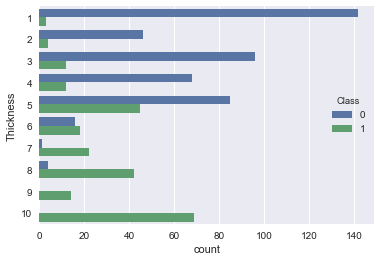

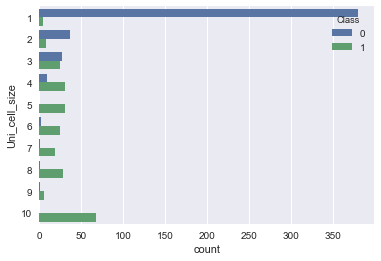

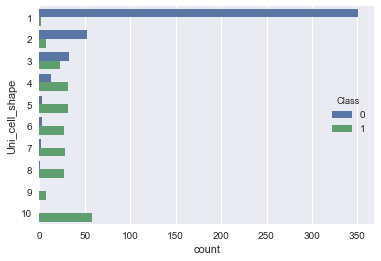

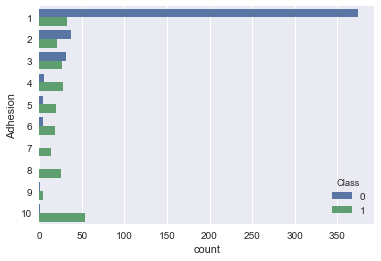

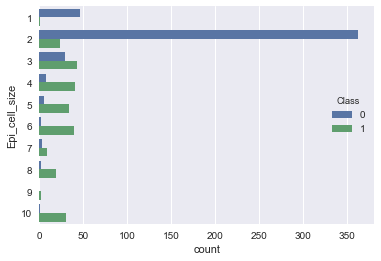

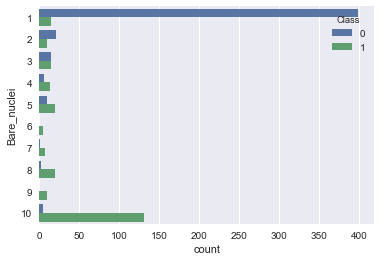

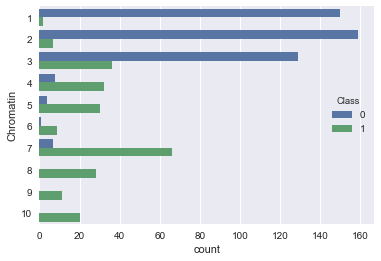

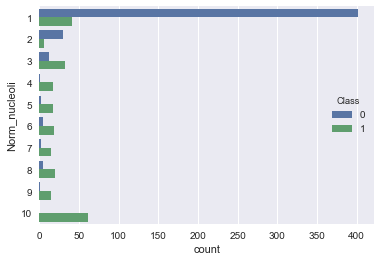

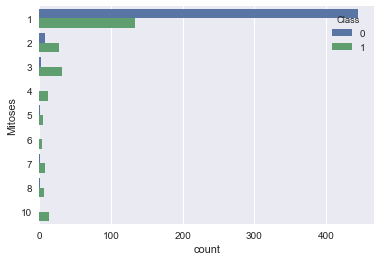

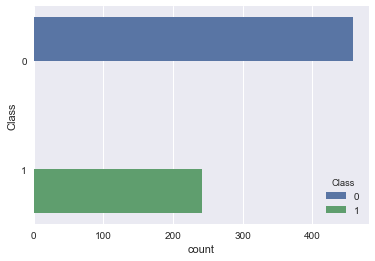

In [173]:
for col in (list(cancer.columns)[1:]):
    sns.countplot(y=col, hue='Class', data=cancer)
    plt.show()

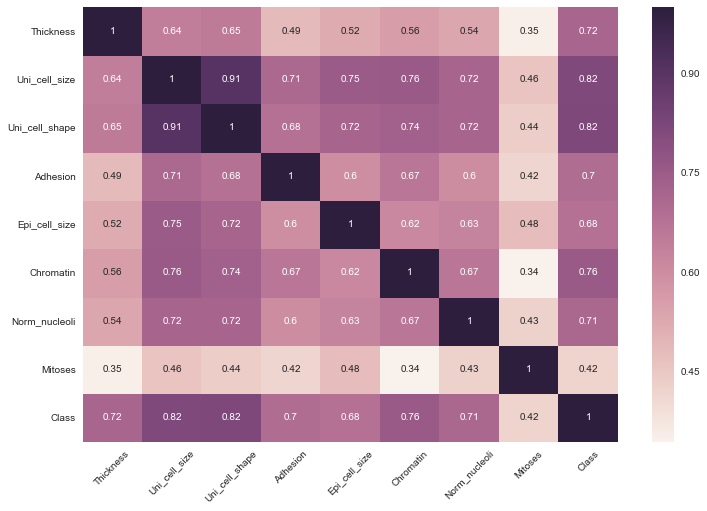

In [108]:
plt.figure(figsize=(12,8))
g = sns.heatmap(cancer.loc[:, 'Thickness': 'Class'].corr(), annot=True)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

In [134]:
# Uni_cell_size and Uni_cell_shape are very similar, keep only shape
# Mitoses has little correlation and is mostly a bunch of 1s
cancer.Mitoses.value_counts()

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [174]:
from sklearn import model_selection

# Create X and y

y = cancer.Class
X = cancer.drop(['Class', 'ID', 'Uni_cell_size', 'Mitoses'], axis=1)

# Split into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

# kNN

All variables are on the same scale and seem to have a linear relationship with Class

In [175]:
from sklearn.neighbors import KNeighborsClassifier


# Using GridSearch for optimal n
params = {'n_neighbors': np.arange(1, 21,2),
         'weights': ['uniform', 'distance'],
         'p': [1]}
nn = KNeighborsClassifier()
grid = model_selection.GridSearchCV(nn, params)

#Fit on train data
grid.fit(X_train, y_train)

#Apply to test
y_pred = grid.predict(X_test)
y_pred_probs = grid.predict_proba(X_test)
table_pd = pd.DataFrame(pd.crosstab(y_pred, y_test, margins=True))
print(table_pd)


grid.best_estimator_


Class    0   1  All
row_0              
0      115   1  116
1        3  56   59
All    118  57  175


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')

In [176]:
# Using GridSearch params
nn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')
nn.fit(X_train, y_train)

# Test fit
y_hat = nn.predict(X_test)
scored = nn.score(X_test, y_test)
print(scored)

cross = pd.crosstab(y_hat, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
precision = cross[0][0]/(cross[0][1]+cross[0][0])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)
print('Precision is: ', precision)
                         


0.971428571429
Class    0   1
row_0         
0      115   2
1        3  55
Accuracy is:  0.971428571429
Sensitivity is:  0.964912280702
Precision is:  0.974576271186


The model is pretty accurate, but the missed cases of cancer should be improved as this carries a high cost.

In [177]:
proba = nn.predict_proba(X_test)[:,1]

threshold = np.where(proba>0.2,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)

Class    0   1
row_0         
0      115   2
1        3  55
Accuracy is:  0.971428571429
Sensitivity is:  0.964912280702


Setting the threshold to 0.2 doesn't alter sensitivity.

In [178]:
# Checking for overfitting
scoring = 'recall'
nn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')
nn_cv = model_selection.cross_val_score(nn, X, y, cv = 10, scoring = scoring)
print(nn_cv)

[ 0.84        0.875       1.          0.95833333  1.          1.
  0.95833333  0.95833333  0.95833333  1.        ]


Therefore some concern about overfitting.

## Logistic regression

In [179]:
from sklearn import linear_model

# Create instance and fit data
ls = linear_model.LogisticRegression()
ls.fit(X_train, y_train)

# Test
y_hat = ls.predict_proba(X_test)[:,1]

# Setting a low threshold
threshold = np.where(y_hat>0.1,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)

Class    0   1
row_0         
0      101   0
1       17  57
Accuracy is:  0.902857142857
Sensitivity is:  1.0


In [185]:
# Checking for overfitting
scoring = 'recall'
lm = linear_model.LogisticRegression()
lm_cv = model_selection.cross_val_score(lm, X, y, cv = 15, scoring = scoring)
print(lm_cv)

[ 0.88235294  0.75        0.875       0.9375      1.          0.9375      1.
  0.9375      1.          0.875       1.          0.9375      0.875       1.
  1.        ]


CV indicates that the model is still overfitting, but it is also possible that the second fold doesn't have enough malign observations to meaningfully apply the model (e.g. if there are only 4 malignant observations in a particular fold and it misclassifies one).

In [181]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

logit = sm.Logit(y_train, X_train)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.104173
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  524
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            7
Date:                Fri, 16 Mar 2018   Pseudo R-squ.:                  0.8393
Time:                        12:48:37   Log-Likelihood:                -54.587
converged:                       True   LL-Null:                       -339.63
                                        LLR p-value:                6.697e-119
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.5391      0.969     -8.815      0.000     -10.438      -6.640
Thickness        

In [183]:
# Removing Norm_nucleoli and Epi_cell_size

ls = linear_model.LogisticRegression()
ls.fit(X_train.drop(['Norm_nucleoli','Epi_cell_size'], axis=1), y_train)

# Test
y_hat = ls.predict_proba(X_test.drop(['Norm_nucleoli','Epi_cell_size'], axis=1))[:,1]

# Setting a low threshold
threshold = np.where(y_hat>0.1,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)

Class    0   1
row_0         
0      103   0
1       15  57
Accuracy is:  0.914285714286
Sensitivity is:  1.0


In [184]:
scoring = 'recall'
lm = linear_model.LogisticRegression()
lm_cv = model_selection.cross_val_score(lm, X.drop(['Norm_nucleoli','Epi_cell_size'], axis=1), y, cv = 10, scoring = scoring)
print(lm_cv)

[ 0.88        0.79166667  1.          0.95833333  1.          1.
  0.91666667  1.          0.91666667  0.95833333]


In [188]:
# Try StratiefiedKFold
count = 0
skf = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
for train_index, test_index in skf.split(X.drop(['Norm_nucleoli','Epi_cell_size'], axis=1), y):
    Xs_train, Xs_test = X.iloc[train_index], X.iloc[test_index]
    ys_train, ys_test = y.iloc[train_index], y.iloc[test_index]
    lm = linear_model.LogisticRegression()
    lm.fit(Xs_train, ys_train)
    y_hat = rf.predict_proba(Xs_test)[:,1]
    # Threshold of 0.5
    threshold = np.where(y_hat>0.5,1,0)
    cross = pd.crosstab(threshold, ys_test)
    print(cross)
    acc = (cross[0][0]+cross[1][1])/len(y_hat)
    sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
    count += 1
    print('Accuracy for fold {} is {}'.format(count, acc))
    print('Sensitivity for fold {} is {}'.format(count, sensitive))

Class   0   1
row_0        
0      46   0
1       0  25
Accuracy for fold 1 is 1.0
Sensitivity for fold 1 is 1.0
Class   0   1
row_0        
0      46   0
1       0  24
Accuracy for fold 2 is 1.0
Sensitivity for fold 2 is 1.0
Class   0   1
row_0        
0      46   0
1       0  24
Accuracy for fold 3 is 1.0
Sensitivity for fold 3 is 1.0
Class   0   1
row_0        
0      46   0
1       0  24
Accuracy for fold 4 is 1.0
Sensitivity for fold 4 is 1.0
Class   0   1
row_0        
0      46   0
1       0  24
Accuracy for fold 5 is 1.0
Sensitivity for fold 5 is 1.0
Class   0   1
row_0        
0      45   0
1       1  24
Accuracy for fold 6 is 0.9857142857142858
Sensitivity for fold 6 is 1.0
Class   0   1
row_0        
0      46   0
1       0  24
Accuracy for fold 7 is 1.0
Sensitivity for fold 7 is 1.0
Class   0   1
row_0        
0      46   0
1       0  24
Accuracy for fold 8 is 1.0
Sensitivity for fold 8 is 1.0
Class   0   1
row_0        
0      45   0
1       0  24
Accuracy for fold 9 is 1.

I should probably just stop here... 

## Gradient boosting

In [148]:
from sklearn import ensemble
# Gradient boost with default hyperparameters
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Testing prediction
y_hat = gbc.predict_proba(X_test)[:,1]

# Assume threshold of .5
threshold = np.where(y_hat>0.5,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)

Class    0   1
row_0         
0      106   8
1        4  57
Accuracy is:  0.931428571429
Sensitivity is:  0.876923076923


In [149]:
# Assume threshold of .5
threshold = np.where(y_hat>0.1,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)

Class    0   1
row_0         
0      106   3
1        4  62
Accuracy is:  0.96
Sensitivity is:  0.953846153846


In [150]:
# Checking for overfitting
scoring = 'recall'
gbc = ensemble.GradientBoostingClassifier()
gbc_cv = model_selection.cross_val_score(gbc, X, y, cv = 10, scoring = scoring)
print(gbc_cv)

[ 0.88        0.75        1.          0.91666667  1.          1.
  0.95833333  1.          0.95833333  0.95833333]


## Random forest

In [151]:
scoring = 'recall'
rf = ensemble.RandomForestClassifier()
rf_cv = model_selection.cross_val_score(rf, X, y, cv = 10, scoring = scoring)
print(rf_cv)

[ 0.92        0.79166667  0.91666667  0.95833333  1.          1.          0.875
  1.          0.95833333  0.95833333]


The low CV scores for all of the models, particularly for the second fold, indicates that some of the samples may have too few malignant (Class=1) observations. This is possible as the data is somewhat unbalanced (33% malignant).

This can be tested through a manual K-fold process with stratified y.

In [187]:
# Try StratiefiedKFold
count = 0
skf = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
for train_index, test_index in skf.split(X, y):
    Xs_train, Xs_test = X.iloc[train_index], X.iloc[test_index]
    ys_train, ys_test = y.iloc[train_index], y.iloc[test_index]
    rf = ensemble.RandomForestClassifier()
    rf.fit(Xs_train, ys_train)
    y_hat = rf.predict_proba(Xs_test)[:,1]
    # Threshold of 0.3
    threshold = np.where(y_hat>0.5,1,0)
    cross = pd.crosstab(threshold, ys_test)
    print(cross)
    acc = (cross[0][0]+cross[1][1])/len(y_hat)
    sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
    count += 1
    print('Accuracy for fold {} is {}'.format(count, acc))
    print('Sensitivity for fold {} is {}'.format(count, sensitive))

Class   0   1
row_0        
0      45   1
1       1  24
Accuracy for fold 1 is 0.971830985915493
Sensitivity for fold 1 is 0.96
Class   0   1
row_0        
0      46   2
1       0  22
Accuracy for fold 2 is 0.9714285714285714
Sensitivity for fold 2 is 0.9166666666666666
Class   0   1
row_0        
0      46   3
1       0  21
Accuracy for fold 3 is 0.9571428571428572
Sensitivity for fold 3 is 0.875
Class   0   1
row_0        
0      46   2
1       0  22
Accuracy for fold 4 is 0.9714285714285714
Sensitivity for fold 4 is 0.9166666666666666
Class   0   1
row_0        
0      43   0
1       3  24
Accuracy for fold 5 is 0.9571428571428572
Sensitivity for fold 5 is 1.0
Class   0   1
row_0        
0      44   1
1       2  23
Accuracy for fold 6 is 0.9571428571428572
Sensitivity for fold 6 is 0.9583333333333334
Class   0   1
row_0        
0      39   2
1       7  22
Accuracy for fold 7 is 0.8714285714285714
Sensitivity for fold 7 is 0.9166666666666666
Class   0   1
row_0        
0      46   2


While the range is still big - bewteen 0.87 and 1.0 - it is a much better result than than the CV with no stratified sampling.

# Conclusion

All the models perform relatively well in terms of accuracy and precision. Given that this is a cancer detection model the emphasis is placed on accurately detecting cancer and minimizing the number of false negatives (where there is a malignant cancer but it is wrongly classified as benign).

The cross-validation scores showed that some overfitting may be happening in the models, but using a better sampling strategy for the CV suggests that it was a poor sample rather than overfitting in most of the models.

The simplified logit model is the best model and has the added bonus of interpretation of the coefficients.